<a href="https://colab.research.google.com/github/srilalala/Tugas_DLTM4/blob/main/Tugas_DLTM4/Tugas_DL_TM4/Running_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'natural-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F42780%2F75676%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240501%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240501T082619Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D16d1dbaaa69ce8e391e8b0829cab86a3f2982cc9eda4a4ecaf6a7ccc55a2cfbf480e1a69026a83a801986097ec351eecc909456064384ee14847a172b0792c090eede2882ebe34789e932b0b772ea6078a5e2e9734a6d987332470b9f432a8d4da26bcc33f6e53ae561a6a281c2c0cb351ba99fe2c2f3c237a5aeab3863969cfbaed8ced594195d922295f894d34fc2e2bedefb832db9352cf6b27bda15799843315957f7552d5978878c3386c302d8b84963e7adcf67d0e9458f6aaa13e044c98e7b824808a34023be197b2d3a26059efc003b0601ac531b31ae3e81078138ad9bd7883a9a13a2f55dd5ab9a940abd07d39d08051577ec37fbb62d879f979ad'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 358905792 bytes downloaded
Downloaded and uncompressed: natural-images
Data source import complete.


In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

In [50]:
labels = os.listdir('../input/natural-images/data/natural_images/')
print(labels)

['dog', 'airplane', 'fruit', 'flower', 'car', 'person', 'cat', 'motorbike']



 DOG


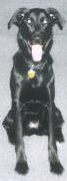

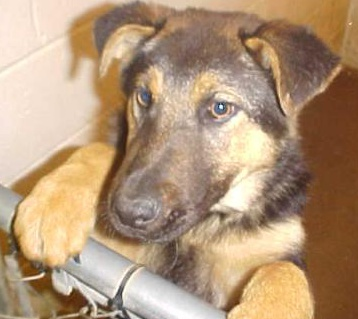

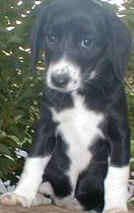

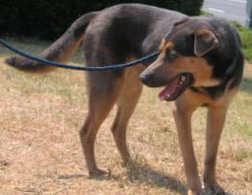

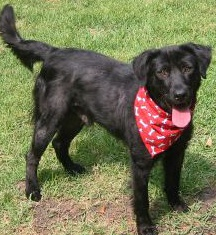

there are  702  images in  dog class

 AIRPLANE


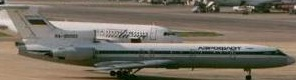

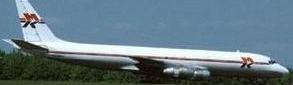

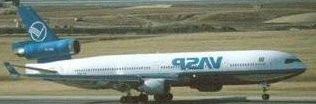

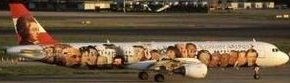

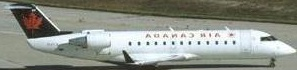

there are  727  images in  airplane class

 FRUIT


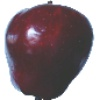

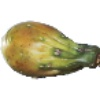

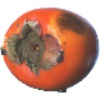

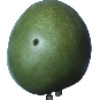

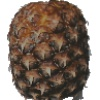

there are  1000  images in  fruit class

 FLOWER


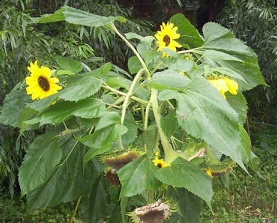

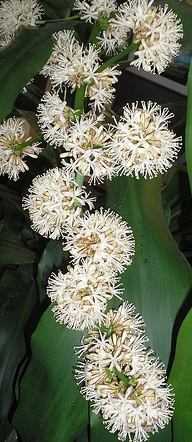

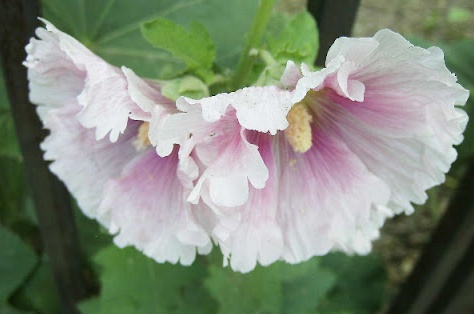

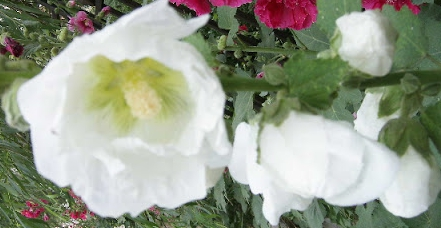

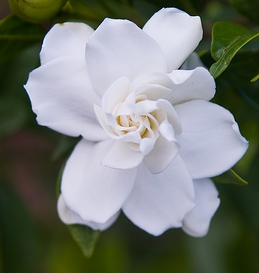

there are  843  images in  flower class

 CAR


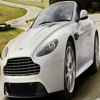

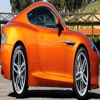

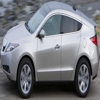

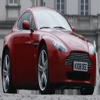

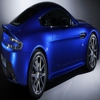

there are  968  images in  car class

 PERSON


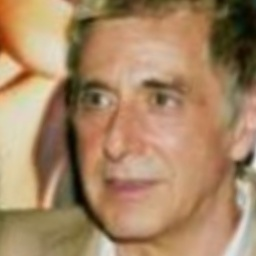

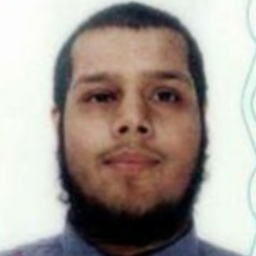

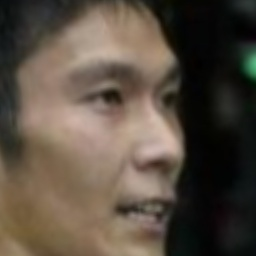

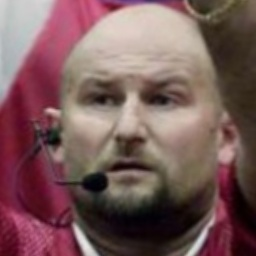

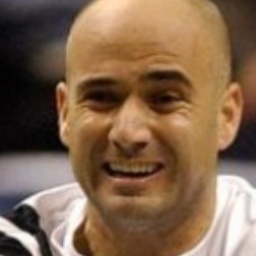

there are  986  images in  person class

 CAT


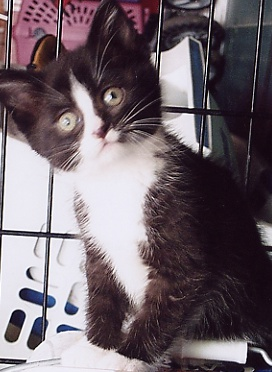

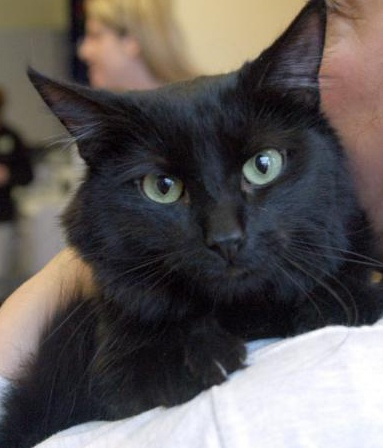

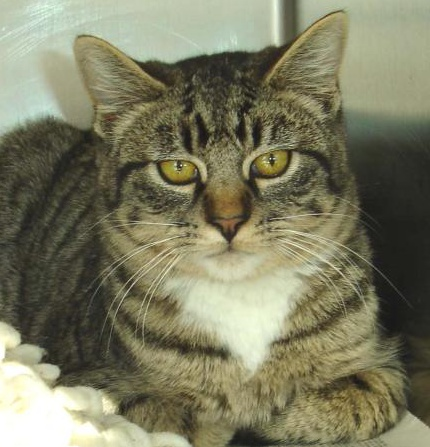

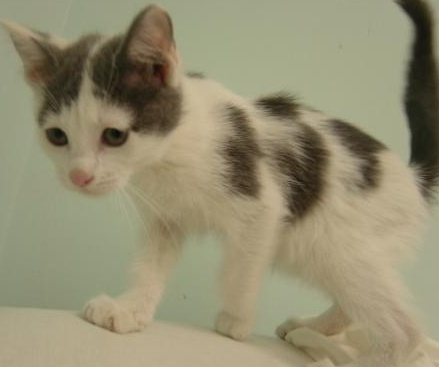

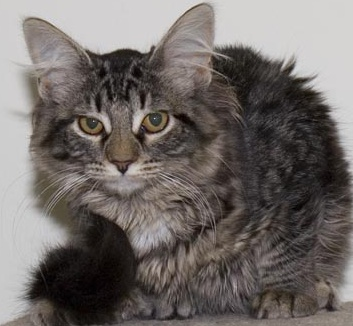

there are  885  images in  cat class

 MOTORBIKE


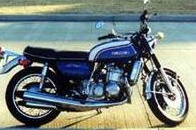

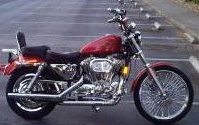

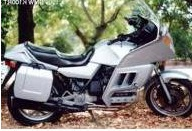

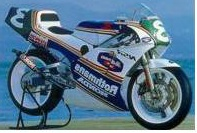

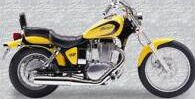

there are  788  images in  motorbike class


In [51]:
from IPython.display import Image, display
num = []
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 5:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

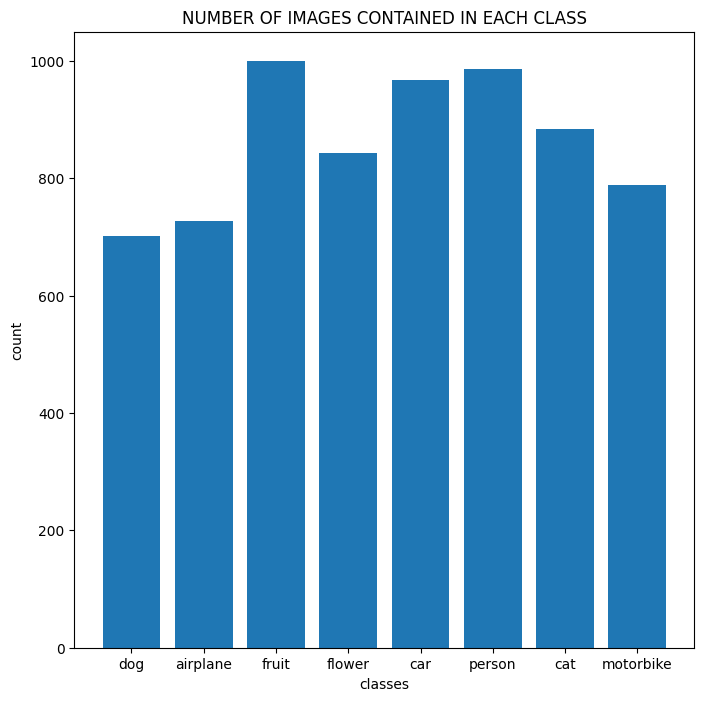

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.bar(labels, num)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('classes')
plt.ylabel('count')
plt.show()

In [53]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '../input/natural-images/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [54]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (6899, 32, 32, 3) and that of Y is:  (6899,)


In [55]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [56]:
#converting the y_data into categorical:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)
from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [57]:
#lets shuffle all the data we have:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [59]:
#structuring the CNN model
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

In [60]:
#let's compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [68]:
#fitting the model
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.2)

Epoch 1/100
116/116 [==============================] - 9s 74ms/step - loss: 0.0291 - accuracy: 0.9881 - val_loss: 0.4567 - val_accuracy: 0.8995
Epoch 2/100
116/116 [==============================] - 7s 61ms/step - loss: 0.0432 - accuracy: 0.9878 - val_loss: 0.4976 - val_accuracy: 0.8822
Epoch 3/100
116/116 [==============================] - 6s 50ms/step - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.4699 - val_accuracy: 0.8941
Epoch 4/100
116/116 [==============================] - 7s 64ms/step - loss: 0.0295 - accuracy: 0.9892 - val_loss: 0.5279 - val_accuracy: 0.8811
Epoch 5/100
116/116 [==============================] - 7s 57ms/step - loss: 0.0296 - accuracy: 0.9895 - val_loss: 0.5373 - val_accuracy: 0.8746
Epoch 6/100
116/116 [==============================] - 7s 62ms/step - loss: 0.0262 - accuracy: 0.9946 - val_loss: 0.7642 - val_accuracy: 0.8432
Epoch 7/100
116/116 [==============================] - 6s 48ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.5337 - val_accuracy:

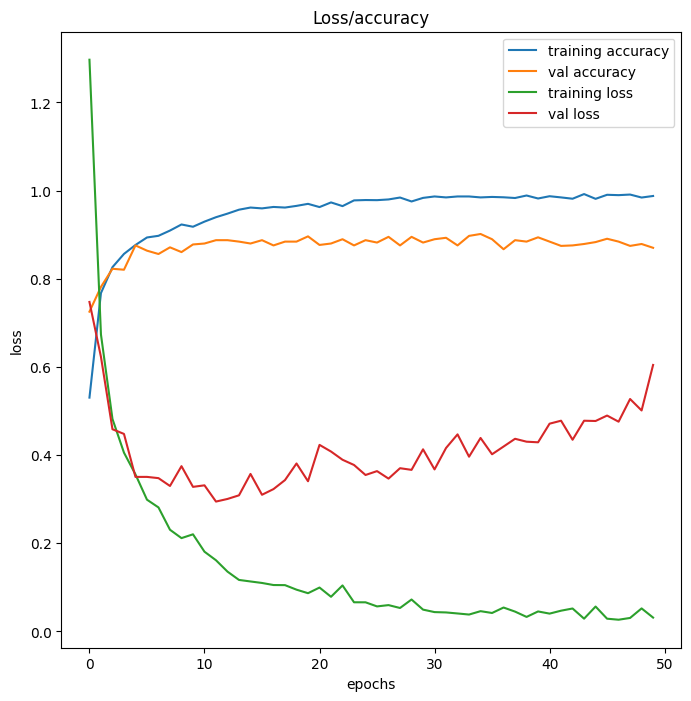

In [62]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

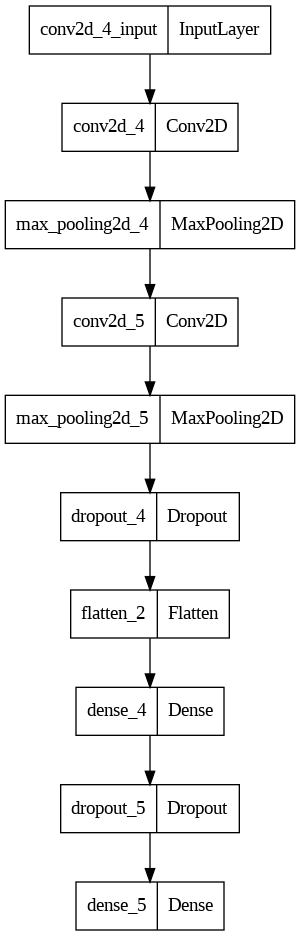

In [63]:
from keras.utils import plot_model
plot_model(model)

In [64]:
Y_pred_probabilities = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred_probabilities, axis=1)


72/72 [==============================] - 1s 14ms/step


In [65]:
#converting over Y test to actual labels.
Y_test = np.argmax(Y_test, axis = 1)

In [66]:
# Prediksi probabilitas kelas menggunakan model
Y_pred_probabilities = model.predict(X_test)

# Ambil indeks kelas dengan probabilitas tertinggi untuk setiap sampel
Y_pred_classes = np.argmax(Y_pred_probabilities, axis=1)

# Hitung dan cetak akurasi
from sklearn.metrics import accuracy_score
print('Akurasi yang diperoleh pada set pengujian adalah:', accuracy_score(Y_pred_classes, Y_test))


72/72 [==============================] - 1s 14ms/step
Akurasi yang diperoleh pada set pengujian adalah: 0.8915239350021958


In [67]:
# Prediksi probabilitas kelas menggunakan model
Y_pred_probabilities = model.predict(X_test)

# Ambil indeks kelas dengan probabilitas tertinggi untuk setiap sampel
Y_pred_classes = np.argmax(Y_pred_probabilities, axis=1)

# Cetak laporan klasifikasi
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_classes))


72/72 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       254
           1       0.91      0.95      0.93       329
           2       0.68      0.76      0.72       282
           3       0.77      0.53      0.63       241
           4       0.89      0.94      0.91       284
           5       0.95      1.00      0.97       329
           6       1.00      0.95      0.97       257
           7       0.98      0.98      0.98       301

    accuracy                           0.89      2277
   macro avg       0.89      0.88      0.88      2277
weighted avg       0.89      0.89      0.89      2277

